In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score



In [63]:
# Laden van de dataset
dataset = pd.read_csv('./CasusData.csv')  # Vervang 'jouw_bestandsnaam.csv' door de werkelijke bestandsnaam


# Data Preprocessing
### 1. Negeren van WAP's met een waarde van 100

In [64]:
# # Negeren van WAP's met een waarde van 100
# mask = ~(dataset == 100).any(axis=1)

### 2. Behandeling van ontbrekende waarden

In [65]:
 # Behandeling van ontbrekende waarden
imputer = SimpleImputer(strategy='mean')
dataset_imputed = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)

print("Dataset na filtering en imputatie:")
print(dataset_imputed.head())


Dataset na filtering en imputatie:
   WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   
1   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   
2   100.0   100.0   100.0   100.0   100.0   100.0   100.0   -97.0   100.0   
3   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   
4   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   

   WAP010  ...  WAP520  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0   100.0  ...   100.0 -7541.2643  4.864921e+06    2.0         1.0    106.0   
1   100.0  ...   100.0 -7536.6212  4.864934e+06    2.0         1.0    106.0   
2   100.0  ...   100.0 -7519.1524  4.864950e+06    2.0         1.0    103.0   
3   100.0  ...   100.0 -7524.5704  4.864934e+06    2.0         1.0    102.0   
4   100.0  ...   100.0 -7632.1436  4.864982e+06    0.0         0.0    122.0   

   RELATIVEPOSITION  USERID

### 3. Feature scaling

In [66]:
# 3. Feature scaling (normalisatie)
# Hier gebruiken we StandardScaler om de features te normaliseren.
scaler = StandardScaler()
features_scaled = scaler.fit_transform(dataset_imputed.iloc[:, :520])

### 4. K-means clustering voor groepering van locaties

In [67]:
# 4. K-means clustering voor groepering van locaties
features_scaled = scaler.fit_transform(dataset_imputed.iloc[:, :520])
kmeans = KMeans(n_clusters=3, random_state=42)
dataset_imputed['LOCATION_CLUSTER'] = kmeans.fit_predict(features_scaled)

print("Dataset na clustering:")
print(dataset_imputed.head())


Dataset na clustering:
   WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   
1   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   
2   100.0   100.0   100.0   100.0   100.0   100.0   100.0   -97.0   100.0   
3   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   
4   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   

   WAP010  ...  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0   100.0  ... -7541.2643  4.864921e+06    2.0         1.0    106.0   
1   100.0  ... -7536.6212  4.864934e+06    2.0         1.0    106.0   
2   100.0  ... -7519.1524  4.864950e+06    2.0         1.0    103.0   
3   100.0  ... -7524.5704  4.864934e+06    2.0         1.0    102.0   
4   100.0  ... -7632.1436  4.864982e+06    0.0         0.0    122.0   

   RELATIVEPOSITION  USERID  PHONEID     TIMESTAMP  LOCATION_CLUSTER  
0               

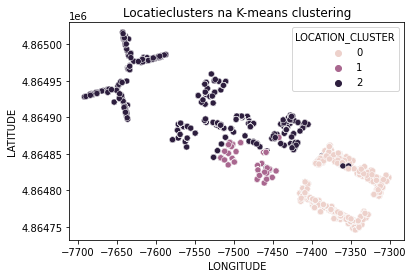

In [68]:
# Visualisatie van de locatieclusters
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='LOCATION_CLUSTER', data=dataset_imputed)
plt.title("Locatieclusters na K-means clustering")
plt.show()

### 5. Nieuwe kolom: WALKING_PATTERN

In [69]:
print(dataset_imputed.columns)

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP',
       'LOCATION_CLUSTER'],
      dtype='object', length=530)


In [72]:
# 5. Nieuwe kolom: WALKING_PATTERN (bijvoorbeeld op basis van locatieverandering)
dataset_imputed['WALKING_PATTERN'] = ((dataset_imputed['LATITUDE'].diff() != 0) | (dataset_imputed['LONGITUDE'].diff() != 0)).astype(int)

In [73]:
print(dataset_imputed.columns)

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION',
       'USERID', 'PHONEID', 'TIMESTAMP', 'LOCATION_CLUSTER',
       'WALKING_PATTERN'],
      dtype='object', length=531)


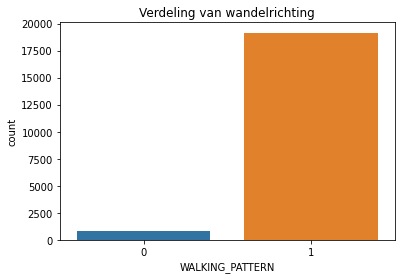

In [74]:
# Visualisatie van het wandelpatroon op de originele dataset
sns.countplot(x='WALKING_PATTERN', data=dataset_imputed)
plt.title("Verdeling van wandelrichting")
plt.show()

### 6. Groeperen op individuele gebruikers

In [ ]:
# Feature engineering voor wandelrichting op basis van patronen
dataset_imputed['WALKING_DIRECTION'] = dataset_imputed['LATITUDE'].diff().apply(lambda x: 1 if x > 0 else 0)

# Groeperen op individuele gebruikers
grouped_data = dataset_imputed.groupby('USERID').agg({
    'WALKING_DIRECTION': 'max',  # Aggregeer de wandelrichting (max waarde over tijd)
    'LOCATION_CLUSTER': 'max',  # Aggregeer de locatiecluster (max waarde over tijd)
    # Voeg andere gewenste aggregaties toe voor extra informatie
}).reset_index()

print("Groeperen op USERID:")
print(grouped_data.head())

Groeperen op USERID:
   USERID  WALKING_DIRECTION  LOCATION_CLUSTER
0     1.0                  1                 2
1     2.0                  1                 2
2     3.0                  1                 0
3     4.0                  1                 2
4     5.0                  1                 2


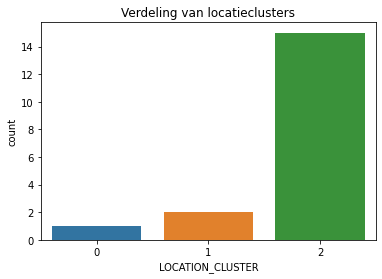

In [75]:
# Visualisatie van de locatieclusters
sns.countplot(x='LOCATION_CLUSTER', data=grouped_data)
plt.title("Verdeling van locatieclusters")
plt.show()

In [ ]:
print(grouped_data.columns)

Index(['USERID', 'WALKING_DIRECTION', 'LOCATION_CLUSTER'], dtype='object')


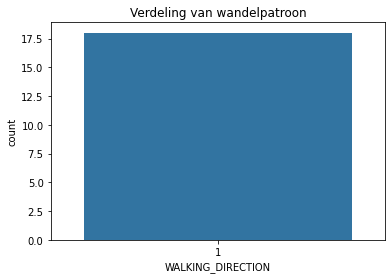

In [ ]:
# Visualisatie van het wandelpatroon op de originele dataset
sns.countplot(x='WALKING_DIRECTION', data=grouped_data)
plt.title("Verdeling van wandelpatroon")
plt.show()

In [ ]:
# Doelvariabele
target = grouped_data['WALKING_DIRECTION']

# Features voor voorspelling (bijvoorbeeld locatiecluster)
features_grouped = grouped_data[['LOCATION_CLUSTER']]

In [ ]:
# Split de data in trainings- en testsets
X_train, X_test, y_train, y_test = train_test_split(features_grouped, target, test_size=0.2, random_state=42)

# Train een Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Voorspel de WALKING_PATTERN op de trainingsset
train_predictions = classifier.predict(X_train)

### Eenvoudige analyse

In [ ]:
# Voorspel de WALKING_DIRECTION op de testset
predictions = classifier.predict(X_test)

# Evaluatie van het model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
# Evaluatie van het model op de trainingsset
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Train Accuracy: {train_accuracy:.2f}')

# Gedetailleerde evaluatie op de trainingsset
print('Train Classification Report:\n', classification_report(y_train, train_predictions))


Train Accuracy: 1.00
Train Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [ ]:
# Confusion Matrix op de trainingsset
train_conf_matrix = confusion_matrix(y_train, train_predictions)
print('Train Confusion Matrix:\n', train_conf_matrix)

Train Confusion Matrix:
 [[14]]


In [ ]:
# Evaluatie van het model op de testset
test_accuracy = accuracy_score(y_test, predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 1.00


In [ ]:
# Gedetailleerde evaluatie op de testset
print('Test Classification Report:\n', classification_report(y_test, predictions))


Test Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [ ]:
# Confusion Matrix op de testset
test_conf_matrix = confusion_matrix(y_test, predictions)
print('Test Confusion Matrix:\n', test_conf_matrix)

Test Confusion Matrix:
 [[4]]


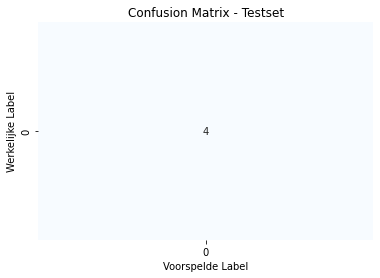

In [76]:
# Visualisatie van de Confusion Matrix op de testset
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Testset')
plt.xlabel('Voorspelde Label')
plt.ylabel('Werkelijke Label')
plt.show()